<a href="https://colab.research.google.com/github/nswapnil31/Data-Science-Projects/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd    # for data manipulation

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
df_train=pd.read_json('/content/sample_data/train_dataset.json',orient="columns")
df_test=pd.read_json('/content/sample_data/test_dataset.json',orient="columns")
df_val=pd.read_json('/content/sample_data/val_dataset.json',orient="columns")

df = pd.concat([df_train, df_test, df_val], axis=0)
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [24]:
df.shape

(7853, 17)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7853 entries, 7233 to 4277
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       7357 non-null   object 
 1   communications          7071 non-null   object 
 2   resolution (px)         7245 non-null   object 
 3   CPU cores               7853 non-null   object 
 4   RAM size                7403 non-null   object 
 5   operating system        7203 non-null   object 
 6   drive type              7418 non-null   object 
 7   input devices           7175 non-null   object 
 8   multimedia              7145 non-null   object 
 9   RAM type                6989 non-null   object 
 10  CPU clock speed (GHz)   6917 non-null   float64
 11  CPU model               7320 non-null   object 
 12  state                   7853 non-null   object 
 13  drive memory size (GB)  7372 non-null   float64
 14  warranty                7853 non-null

In [26]:
df.describe()

,CPU clock speed (GHz),drive memory size (GB),buynow_price
count,6917.00000,7372.000000,7853.000000
mean,2.33743,653.239826,3475.527050
std,0.39109,477.616013,1730.904165
min,0.00000,0.000000,429.000000
25%,2.00000,256.000000,2199.000000
50%,2.50000,500.000000,3149.000000
75%,2.60000,1000.000000,4399.000000
max,3.90000,10000.000000,15472.650000


In [27]:
# Look at unique values of each column, except the ones formatted as list
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("\n-----------------------------------------------------")

unique values of graphic card type are:  ['dedicated graphics' None 'integrated graphics']

-----------------------------------------------------
unique values of resolution (px) are:  ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']

-----------------------------------------------------
unique values of CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']

-----------------------------------------------------
unique values of RAM size are:  ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '24 gb' '256 mb']

-----------------------------------------------------
unique values of drive type are:  ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']

-----------------------------------------------------
unique values of RAM type are:  ['ddr4' 'ddr3' None 'ddr3l']

-----------------------------------------------------
unique values o

In [28]:
#  state only takes one value  
# drop this column since it won't effect the price
df = df.drop(columns=['state'])
df = df.dropna()

In [29]:
# columns of communications, input_devices and multimedia include multiple values in a cell in list format
# not possible to represent them in numerics in its current format
# split the values of these columns into different columns
compact_cols = ['communications', 'input devices', 'multimedia']

In [30]:
# use to_list( ) function to split lists into columns
# example of to_list( ) function of pandas
pd.DataFrame(df['communications'].to_list())

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100/1000 mbps,lan 10/100 mbps,intel wireless display (widi),nfc (near field communication),modem 3g (wwan)
6106,bluetooth,lan 10/100 mbps,None,None,None,None
6107,bluetooth,lan 10/100/1000 mbps,lan 10/100 mbps,intel wireless display (widi),nfc (near field communication),modem 3g (wwan)


In [31]:
# get unique values of each features in our predefined lists 
# and convert them to new feature names

def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column   
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

In [32]:
compact_dict = {col: [] for  col in compact_cols}

# apply get_unique_vals to all compact_cols
# search through the dataframe and add a feature to unique_vals list when it is not included before
for col in compact_cols:
    compact_dict[col] = get_unique_vals(col)

In [33]:
compact_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

In [35]:
# transform string value to integer by excluding gb and mb
df['RAM size'] = df['RAM size'].str.replace(' gb','',regex=True)

# when regex=False, replace requires exact match
df['RAM size'] = df['RAM size'].str.replace('256 mb','0.256',regex=False)
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.0


In [37]:
# screen size column is given as intervals. 
# convert it as integers such as so 11.9" and less would become 11
df['screen size'] = df['screen size'].apply(lambda x: int(str(x)[:2]))
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.0


In [39]:
# split resolution (px) column into two columns of integers (resolution_x and resolution_y)
# as 1280 x 800 would have 1280 in the first column and 800 in the second column 
df['resolution_x'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
df['resolution_y'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.0,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.0,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.0,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.0,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.0,1920,1080


In [40]:
# resolution (px) is divided into resolution_x and resolution_y 
# drop resolution (px) 
df = df.drop(columns=['resolution (px)'])

In [41]:
df.dtypes

graphic card type          object
communications             object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                 int64
buynow_price              float64
resolution_x                int64
resolution_y                int64
dtype: object

In [42]:
# put all numerical columns together
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df.head()

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0


In [43]:
# use get_dummies( ) from pandas library to convert operating system column as categories
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummies_df.head()

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0


In [44]:
# apply same logic to other suitable variables
dummy_cols = ['drive type', 'RAM type', 'CPU model']
for col in dummy_cols:
    col_dummies_df = df[col].str.get_dummies()
    dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
    
dummies_df.head()

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
# check remaining columns
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols + ['operating system'] + dummy_cols]
categorical_columns

['graphic card type', 'warranty']

In [48]:
# encode them
categorical_df = pd.get_dummies(df[categorical_columns])
categorical_df.head()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0


In [49]:
# put unique_vals to compact_df columns
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df.head()

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as a feature assign 1, otherwise 0
for col, unique_list in compact_dict.items():
    for unique in unique_list:
        compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)

compact_df.head()

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1


In [51]:
# concatenate all processed dataframe to put together
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df],axis=1)
new_df.head(5)

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel celeron dual-core,intel celeron m,intel celeron quad core,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU
7233,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0
5845,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,0,0,0,1,0,0,0,0
5897,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,0,0,0,1
4870,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,0,0,0,1,0,0,0,0,0,0
2498,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,0,0,0,1,0,0,0,0


**Multicollinearity Check**

Multicollinearity is a potential problem for this regression task. We will check it through Variance Inflation Factor (VIF). We will eliminate all features that have VIF score above 20. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [53]:
# compute VIF score with variance_inflation_factor() function
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(new_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [54]:
# apply VIF computation to all columns
features = new_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032274
2,windows 7 professional 32-bit,1.038891
3,wi-fi 802.11 a/b/g/n,1.074409
4,wi-fi 802.11 a/b/g/n/ac,1.120751
...,...,...
63,warranty_seller warranty,inf
64,warranty_producer warranty,inf
65,graphic card type_integrated graphics,inf
66,amd a12,inf


In [55]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove other CPU


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


I will remove graphic card type_dedicated graphics
I will remove ssd
I will remove ddr3
I will remove warranty_producer warranty
I will remove resolution_x
I will remove touchpad
I will remove screen size
I will remove camera
I will remove CPU clock speed (GHz)
I will remove windows 10 home
I will remove keyboard
I will remove intel core i7
I will remove bluetooth
I will remove CPU cores
I will remove microphone


,feature,VIF
0,windows 8.1 professional 32-bit,1.004397
1,windows 7 home 64-bit,1.007451
2,intel celeron m,1.019598
3,windows 7 professional 32-bit,1.022183
4,windows 8.1 home 32-bit,1.028446
5,intel core m,1.030207
6,amd a4,1.036642
7,amd e1,1.043705
8,amd a10,1.046219
9,amd a12,1.069440


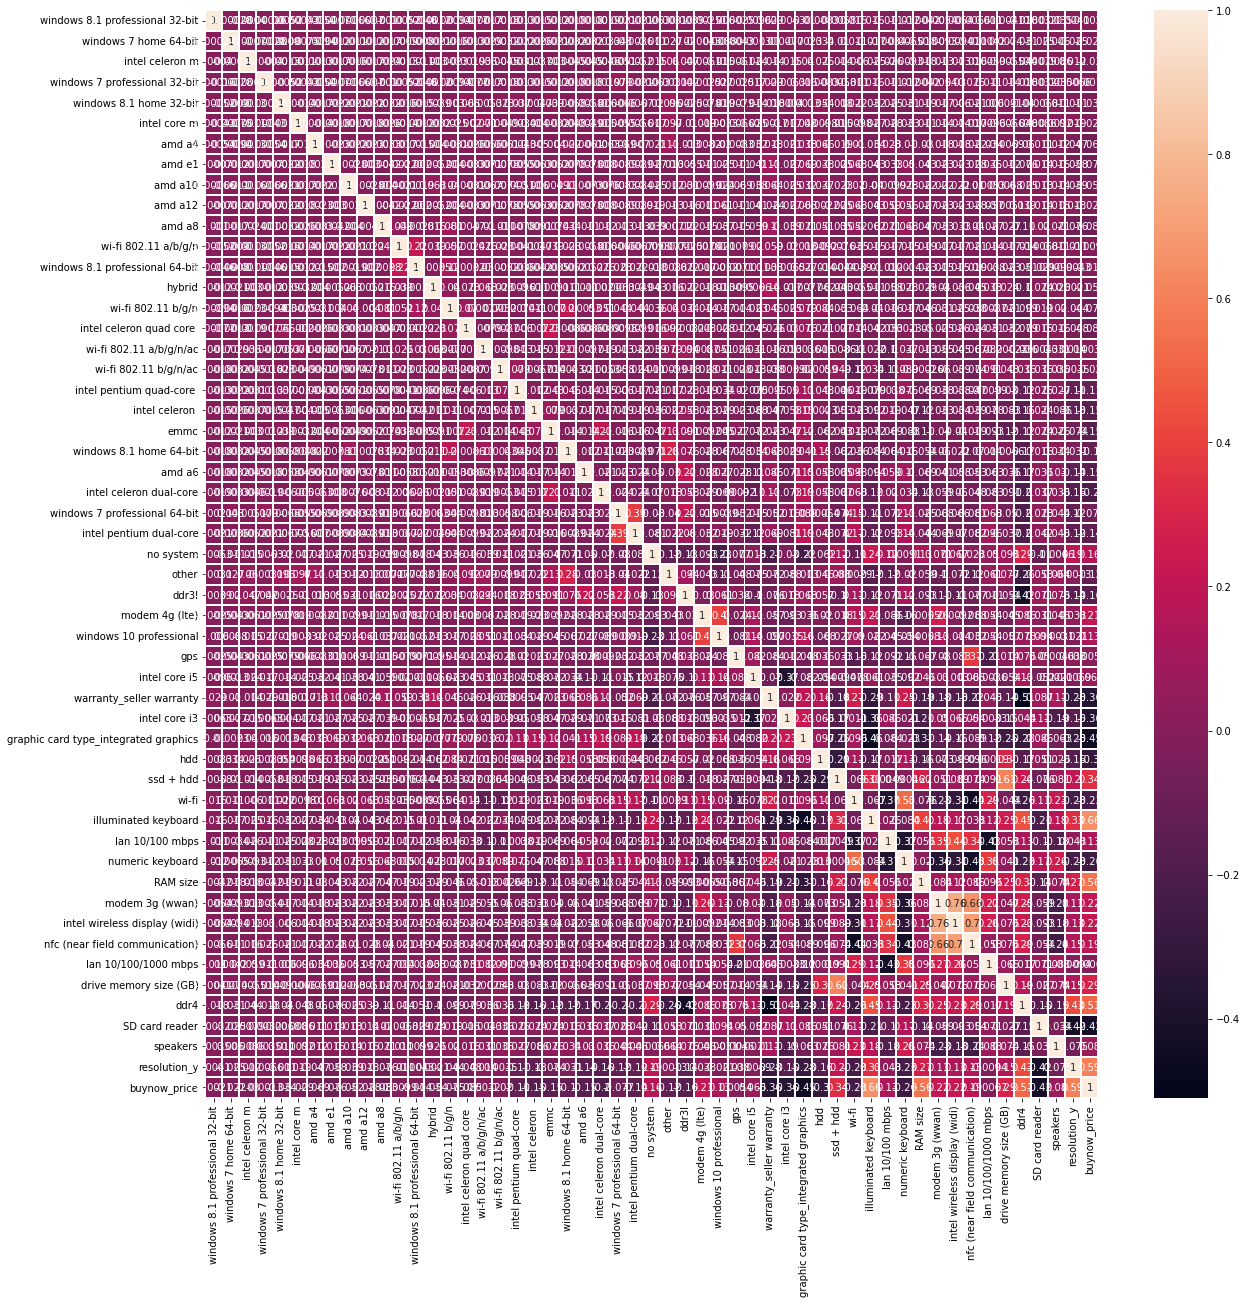

In [56]:
# correlation matrix of multicollinearity free dataset
plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

Train/Val/Test Split

In [57]:
# use the indeces of given datasets to properly separate it again as initial datasets
train_indeces = df_train.dropna().index
val_indeces = df_val.dropna().index
test_indeces = df_test.dropna().index

In [58]:
train_df = new_df.loc[train_indeces]
val_df = new_df.loc[val_indeces]
test_df = new_df.loc[test_indeces]

In [59]:
# sklearn machine learning models expect y_train, y_test, y_val 
# in the shape as (row_number, ) instead of (row_number, 1) shape, so apply .ravel()
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

In [60]:
X_train.shape

(3694, 52)

In [61]:
y_train.shape

(3694,)

**Classical Machine Learning**

We will implement and try different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error as instructed. We will scale our data with MaxAbsScaler() from sklearn, which works well with sparse datasets.

In [62]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [63]:
def rmse(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)

Linear : 65204241682530.21
MLP : 719.6561002119159
DecisionTree : 656.6811883268169
RandomForest : 557.0123635130183
GradientBoosting : 526.9818640941238
ExtraTrees : 577.5740215020353


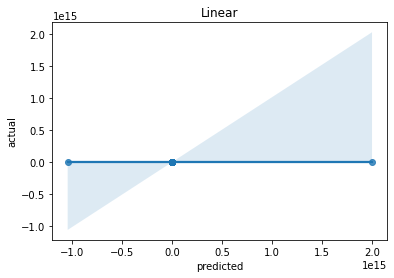

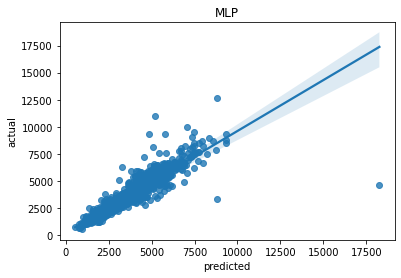

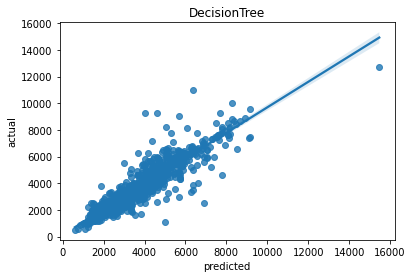

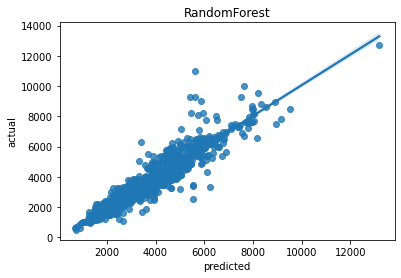

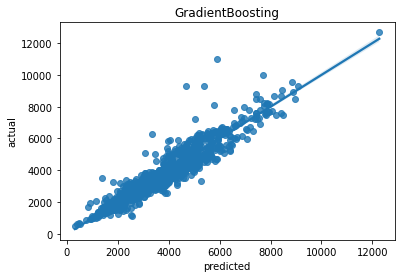

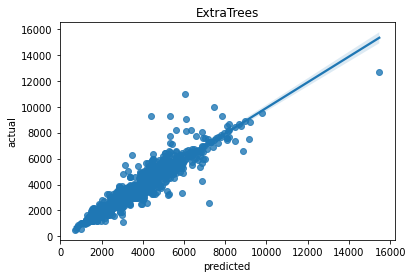

In [65]:
def regression(regressor_name, regressor):
#     alternative scaler 
#     pipe = make_pipeline(StandardScaler(), regressor)
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train) 
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(regressor_name, ':', rmse_val)
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)
    
regressors = {
    'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key])

Voting Regressor

Voting : 504.99219187047


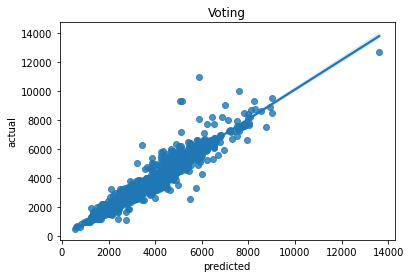

In [66]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# take the highest performed three models and combine them in a voting mechanism
# assign weights to their predictions and create new regressor
# it is possible to try with different weights 
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.35, 0.25]))

In [68]:
pred_df.head()

,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
0,2369.0,2525.762169,2281.069884,2369.000000,2314.900000,2476.255231,2369.0,2398.377092
1,2299.0,2446.923145,2308.562792,2395.666667,2294.250000,2252.793867,2299.0,2279.330047
2,5999.0,5051.801823,5132.973968,5063.285714,5003.982143,5103.177670,4999.0,5041.916604
3,1299.0,1172.393477,1288.382241,1325.615385,1263.420040,1254.143349,1261.5,1259.037350
4,3329.0,5921.136881,8828.099076,6274.000000,6224.232042,5281.607409,5908.6,5736.710974


It improves the performance of the RandomForest. We can go ahead with this voting model as our official solution.

Deep Learning

Another promising regression algorithm is artificial neural networks. We will create a small one with 4 hidden units since we have small data. We will use a scheduler to decrease the learning rate after a certain epoch number. Also, to prevent overfitting, we will use EarlyStopping.

We will make a comparison between a complex model (two hidden layers) and a base model to see what works best.

In [69]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
# set random for reproducibility
tf.random.set_seed(42)


# define the error metric using keras background
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
    

# define base model architecture
def build_and_compile_base_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

# define complex model architecture
def build_and_compile_complex_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(8, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
    model.build(input_shape=(None,len(selected_features)))
    return model

In [70]:
# compile base model
dnn_model = build_and_compile_base_model()

In [71]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 52)               105       
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                3392      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,762
Trainable params: 3,657
Non-trainable params: 105
____________________________________________________

In [72]:
# initialize scheduler and early stopping callback
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True)

# train base model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=400)

Epoch 1/400
116/116 [==============================] - 3s 12ms/step - loss: 1941.2338 - val_loss: 1309.3765 - lr: 0.0050
Epoch 2/400
116/116 [==============================] - 1s 6ms/step - loss: 1329.2891 - val_loss: 1277.6927 - lr: 0.0050
Epoch 3/400
116/116 [==============================] - 1s 11ms/step - loss: 1293.8693 - val_loss: 1257.2697 - lr: 0.0050
Epoch 4/400
116/116 [==============================] - 1s 10ms/step - loss: 1267.0271 - val_loss: 1211.8590 - lr: 0.0050
Epoch 5/400
116/116 [==============================] - 1s 6ms/step - loss: 1213.0170 - val_loss: 1163.2268 - lr: 0.0050
Epoch 6/400
116/116 [==============================] - 1s 7ms/step - loss: 1160.7651 - val_loss: 1153.5107 - lr: 0.0050
Epoch 7/400
116/116 [==============================] - 1s 6ms/step - loss: 1100.0266 - val_loss: 1030.9146 - lr: 0.0050
Epoch 8/400
116/116 [==============================] - 0s 3ms/step - loss: 1048.7467 - val_loss: 1013.2138 - lr: 0.0050
Epoch 9/400
116/116 [================

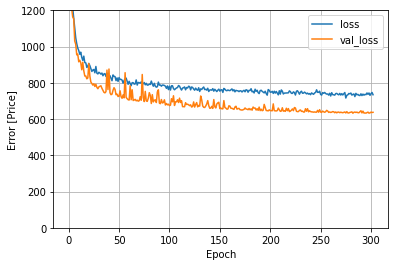

In [73]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1200])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [74]:
# test model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 [==============================] - 0s 1ms/step - loss: 717.1274


717.12744140625

In [75]:
# compile complex model
dnn_model = build_and_compile_complex_model()

In [76]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 52)               105       
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                3392      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                      

In [77]:
# train complex model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    callbacks = [scheduler_c, early_stopping],
    verbose=1, epochs=50)

Epoch 1/50
116/116 [==============================] - 2s 9ms/step - loss: 2039.3521 - val_loss: 1297.9049 - lr: 0.0050
Epoch 2/50
116/116 [==============================] - 0s 3ms/step - loss: 1330.5768 - val_loss: 1287.4249 - lr: 0.0050
Epoch 3/50
116/116 [==============================] - 0s 3ms/step - loss: 1303.7809 - val_loss: 1241.9270 - lr: 0.0050
Epoch 4/50
116/116 [==============================] - 0s 3ms/step - loss: 1271.9642 - val_loss: 1199.0645 - lr: 0.0050
Epoch 5/50
116/116 [==============================] - 0s 3ms/step - loss: 1210.9304 - val_loss: 1129.3448 - lr: 0.0050
Epoch 6/50
116/116 [==============================] - 0s 3ms/step - loss: 1125.7738 - val_loss: 1018.9752 - lr: 0.0050
Epoch 7/50
116/116 [==============================] - 0s 3ms/step - loss: 1074.1094 - val_loss: 983.8928 - lr: 0.0050
Epoch 8/50
116/116 [==============================] - 0s 3ms/step - loss: 1017.5908 - val_loss: 945.1708 - lr: 0.0050
Epoch 9/50
116/116 [==============================

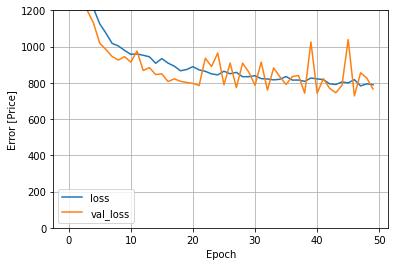

In [78]:
plot_loss(history)

In [79]:
# test complex model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 [==============================] - 0s 4ms/step - loss: 800.1285


800.1284790039062

This result is slightly worse than the base model. Probably, our task is not so complex to solve with deep neural networks. So, we choose voting regressor performance as best for this dataset among all explored algorithms.

**Feature Selection**

Feature selection hurts the performance of this task. However, it is always best to present all the methods applied through the assignment. Hence, we are representing it also. We used f_regression and RandomForestRegressor.modelimportances to check feature importance. We decided on k=15, but you can change and see the results for different k values.

In [80]:
from sklearn.feature_selection import SelectKBest, f_regression
#Select top 25 features based on f-regression
selector = SelectKBest(f_regression, k =25)
X = new_df[selected_features].to_numpy()
y = df[label_col].to_numpy().ravel()
selector.fit(X, y)
cols = new_df[selected_features].columns[selector.get_support()].to_list()
cols

['intel celeron ',
 'emmc',
 'amd a6',
 'intel celeron dual-core',
 'intel pentium dual-core',
 'no system',
 'ddr3l',
 'modem 4g (lte)',
 'warranty_seller warranty',
 'intel core i3',
 'graphic card type_integrated graphics',
 'hdd',
 'ssd + hdd',
 'wi-fi',
 'illuminated keyboard',
 'lan 10/100 mbps',
 'numeric keyboard',
 'RAM size',
 'modem 3g (wwan)',
 'intel wireless display (widi)',
 'nfc (near field communication)',
 'drive memory size (GB)',
 'ddr4',
 'SD card reader',
 'resolution_y']

In [81]:
X_train, X_val, X_test = train_df[cols].to_numpy(), val_df[cols].to_numpy(), test_df[cols].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 689.5841293235402


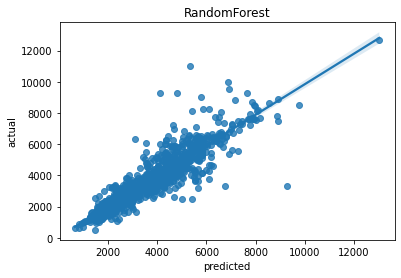

In [82]:
regression('RandomForest', regressors['RandomForest'])

Feature: windows 8.1 professional 32-bit , Score: 4.973371134104074e-06
Feature: windows 7 home 64-bit , Score: 0.0
Feature: intel celeron m , Score: 3.943939831647907e-05
Feature: windows 7 professional 32-bit , Score: 0.0
Feature: windows 8.1 home 32-bit , Score: 5.0467194254702984e-05
Feature: intel core m , Score: 0.00020479544394336958
Feature: amd a4 , Score: 0.00023012608983633226
Feature: amd e1 , Score: 7.565799456190145e-05
Feature: amd a10 , Score: 0.00019426092177305207
Feature: amd a12 , Score: 0.00024066812922089715
Feature: amd a8 , Score: 0.00017034014453873547
Feature: wi-fi 802.11 a/b/g/n , Score: 0.00022288687987535765
Feature: windows 8.1 professional 64-bit , Score: 0.001235310470718396
Feature: hybrid , Score: 0.000499177576732892
Feature: wi-fi 802.11 b/g/n , Score: 0.0001526397408483957
Feature: intel celeron quad core  , Score: 7.357701733413615e-05
Feature: wi-fi 802.11 a/b/g/n/ac , Score: 0.001067458351317804
Feature: wi-fi 802.11 b/g/n/ac , Score: 0.00059604

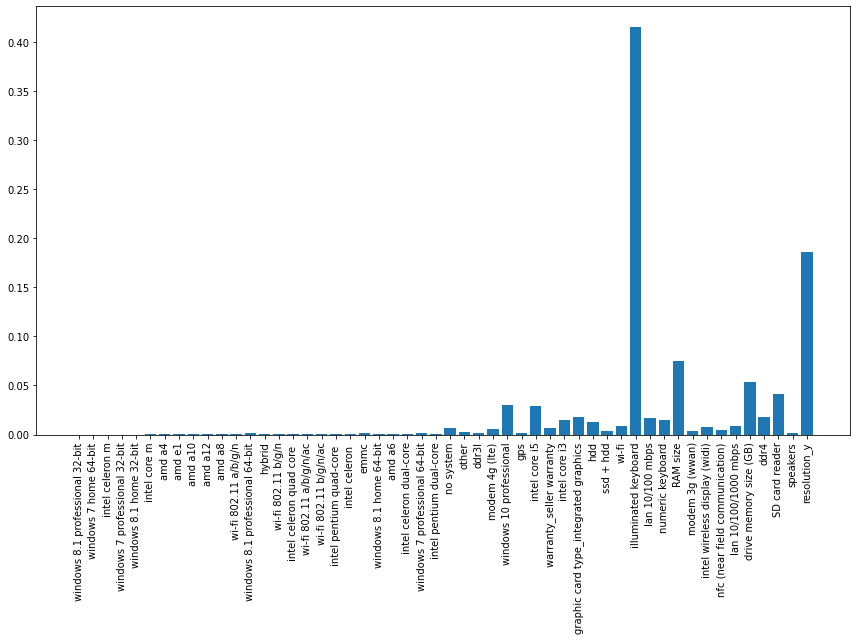

In [83]:
X = new_df[selected_features].values
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()
model = RandomForestRegressor(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature: {selected_features[i]} , Score: {v}")
# plot feature importance
plt.figure(figsize=(12, 9)) # width and height in inches
plt.bar(selected_features, importance)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [85]:
feats_w_highest_importance = np.array(selected_features)[importance > 0.02].tolist()
feats_w_highest_importance

['windows 10 professional',
 'intel core i5',
 'illuminated keyboard',
 'RAM size',
 'drive memory size (GB)',
 'SD card reader',
 'resolution_y']

In [87]:
X_train, X_val, X_test = train_df[feats_w_highest_importance].to_numpy(), val_df[feats_w_highest_importance].to_numpy(), test_df[feats_w_highest_importance].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 712.3894667966214


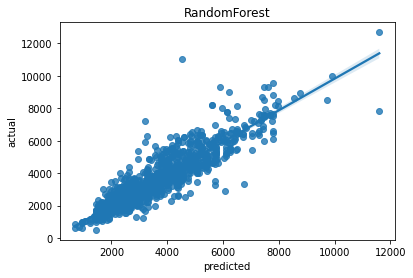

In [88]:
regression('RandomForest', regressors['RandomForest'])